### Grupowanie

[pandas GroupBy: Your Guide to Grouping Data in Python](https://realpython.com/pandas-groupby/)

https://github.com/unitedstates/congress-legislators - Zbiór danych Kongresu USA zawiera publiczne informacje o historycznych członkach Kongresu.

Wczytajmy dane

In [ ]:
# pandas_legislators.py
import pandas as pd
...

In [ ]:
...

In [ ]:
...

Spróbujmy teraz podziałać z grupowaniem.

Ilu jest w zbiorze kongresmenów w poszczególnych stanach. Tego typu zapytanie w języku sql mogłoby mieć postać: <pre><code>SELECT state, count(name)
FROM df
GROUP BY state
ORDER BY state;
</code></pre>

A jak to będzie wyglądało w pandas?

Klauzula `groupby` stworzy worki, po jednym worku na każdy stan.

In [ ]:
...

Na workach możemy wykonywać jakieś statystyki (tzw. funkcje agregujące), np. możemy zliczyć ile jest niepustych wpisów w każdym z worków za pomocą funkcji `count`.

In [ ]:
...

albo ile jest niepustych wpisów dla wybranej kolumny (gdybyśmy chcieli uwzględnić również wpisy z pustymi wartościami należałoby zamiast metody `count` użyć metody `size`).

In [ ]:
...

10 pierwszych wpisów

In [ ]:
...

Możemy grupować po kilku kolumnach. Każdy kolejny poziom grupowania oznacza stworzenie worków wewnątrz innych worków. Możemy na przykład wewnątrz naszych worków dla poszczególnych stanów potworzyć worki na płeć. I na takich "podworkach" wyliczyć jakieś statystyki.

Ile było kobiet i mężczyzn kongresmenów w poszczególnych stanach.

Zapytanie sql miałoby postać: <pre><code>SELECT state, gender, count(name)
FROM df
GROUP BY state, gender
ORDER BY state, gender;</code></pre>

Zapytanie pandas:

In [ ]:
...

Metoda `groupby` biblioteki pandas i klauzula `GROUP BY` języka sql są podobne, ale nie identyczne. Jedną z ważniejszych różnic pomiędzy nimi jest postać zwracanego wyniku. Podczas gdy klauzula `GROUP BY` zwraca result set, metoda `groupby` zwraca serię (w przypadku więcej niż jeden poziom worków metoda zwraca serię z wielokrotnym indeksem).

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
res.index

Możemy zapobiec tworzeniu wielokrotnego indeksu za pomocą parametru `as_index`.

In [ ]:
...

Wtedy worki zostaną "rozrzucone" po kolumnach wynikowej ramki.

In [ ]:
...

In [ ]:
...

Druga różnica pomiędzy klauzulą `GROUP BY` i metodą `groupby` polega na tym, że metoda `groupby` domyślnie sortuje wynik (odpowiada za to parametr `sort`, którego domyślna wartości to `True`) podczas gdy klauzula `GROUP by` nie sortuje result seta.

#### `groupby` technikalia

Kiedy już nauczyliśmy się jak używać metody `groupby` pora na zapoznanie się z mechanizmem tej metody.

Przypomnijmy sobie co zwraca metoda `groupby`.

In [ ]:
...

obiekt klasy `DataFrameGroupBy`.

Dlaczego nie wyświetlił się nam wynik już na tym etapie ?

Ponieważ klasa DataFrameGroupBy jest **leniwa** w swojej naturze. Dopóki nie wskażemy co chcemy zrobić (`.count`, `.sum`, `.agg`) nie zacznie grupować, ponieważ w zależności od tego co chcemy otrzymać samo zapytanie może być inaczej realizowane. A nawet jak już wskażemy co chcemy zrobić pandas wciąż nie zacznie wykonywać zapytania. Innymi słowy, zapisanie:

In [ ]:
...

nie spowoduje wykonania zapytania. Dopiero konsumpcja wyniku, czyli moment w którym wynik jest nam już potrzebny, bo dalej coś z nim robimy, jest momentem wykonania obliczeń. Na przykład:

In [ ]:
...

Najczęstszymi sposobami konsumowania wyniku są:
- wyświetlanie wyniku
- iterowanie się po wyniku
- rzutowanie wyniku na jakiś typ (np. listę)

I wszystkie inne operacje przy których wynik jest nam potrzebny, żeby móc pójść dalej.

W kontekście metody `groupby` biblioteki pandas, często pojawia się zbitka słów **split-apply-combine**. Co ona oznacza ?

Formuła **split-apply-combine** odnosi się do trzech kroków, które przeważnie realizowane są "pod maską" przez metodę `groupby`:
- split - rozbicie tabeli na grupy (worki)
- apply - zastosowanie jakiejś operacji na każdej grupie (worku) z osobna
- combine - połączenie wyników

Nie jest jednak łatwo zrobić inspekcje metody `groupby`, ponieważ żaden z tych kroków nie jest wykonywany do czasu aż nie zrobimy czegoś do czego potrzebny nam jest już konkretny wynik zapytania.

Jak więc rozdzielić kroki split, apply i combine jeżeli nie możemy przyjrzeć się żadnemu z nich z osobna ? Zacznijmy od split.

Dobrym sposobem na zobaczenie kroku split w akcji jest przeiterowanie się po obiekcie klasy `DataFrameGroupBy`.

In [ ]:
...

In [ ]:
...

Innym dobrym sposobem na analizę etapu split jest atrybut `groups`, który zwraca słownik z parami: nazwa grupy i listą etykiet elementów przypisanych do tej grupy).

In [ ]:
...

Popatrzmy na jedną groupę.

In [ ]:
...

lub metoda `get_group()`

In [ ]:
...

Metoda `.get_group("AL")` jest odpowiednikiem filtra: <pre><code>df.loc[df["state"] == "AL"]</code></pre>

A teraz co z etapem `apply` ?

Na tym etapie wskazana operacja jest wykonywana na każdej z utorzonych na etapie split grup.

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

I to pasuje do naszego ostatecznego wyniku.

Ostatni z etapów **combine** zbiera do jednej ramki/serii wszystkie otrzymane, cząstkowe wynik.

Podsumowując całość, schemat działania metody `groupby` możemy przedstawić za pomocą ilustracji:

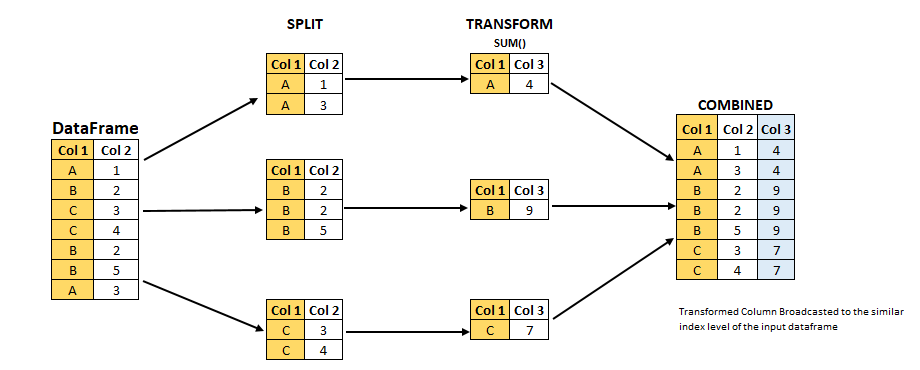